In [2]:
import numpy as np
import matplotlib.pyplot as pp
import pandas as pd
import seaborn

In [3]:
%matplotlib inline

In [4]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [5]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [4]:
open('names/yob2011.txt', 'r').readlines()[:10]

['Sophia,F,21816\r\n',
 'Isabella,F,19870\r\n',
 'Emma,F,18777\r\n',
 'Olivia,F,17294\r\n',
 'Ava,F,15480\r\n',
 'Emily,F,14236\r\n',
 'Abigail,F,13229\r\n',
 'Madison,F,12360\r\n',
 'Mia,F,11512\r\n',
 'Chloe,F,10970\r\n']

In [5]:
names2011 = pd.read_csv('names/yob2011.txt', names = ['name', 'sex', 'number'])

In [6]:
names2011.head()

,name,sex,number
0,Sophia,F,21816
1,Isabella,F,19870
2,Emma,F,18777
3,Olivia,F,17294
4,Ava,F,15480


In [10]:
# read in all the files
names_all = []

for year in range(1880, 2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names = ['name', 'sex', 'number']))
    # add the last element of the list as the year variable
    names_all[-1]['year'] = year
# concat all the years together    
allyears = pd.concat(names_all)

In [11]:
allyears.head()

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [12]:
allyears.tail()

,name,sex,number,year
33039,Zykeem,M,5,2014
33040,Zymeer,M,5,2014
33041,Zymiere,M,5,2014
33042,Zyran,M,5,2014
33043,Zyrin,M,5,2014


In [13]:
# reshape the data so we can see the changing popularity for a given name
# index the data in gender, name and year
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [14]:
allyears_indexed.head()

number
sex name      year        
F   Aabha     2011       7
              2012       5
              2014       9
    Aabriella 2008       5
              2014       5

In [15]:
# setting and sorting indices 
# selecting rows by index value
# making a stacked line plot in matplotlib

# use loc we can select any combination of the index 
# find how many 'Mary' for each year
allyears_indexed.loc['F', 'Mary'].head()

,number
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217


In [16]:
# function to select the sex and the name 
def plotname(sex, name):
    data = allyears_indexed.loc[sex, name]
    
    pp.plot(data.index, data.values)

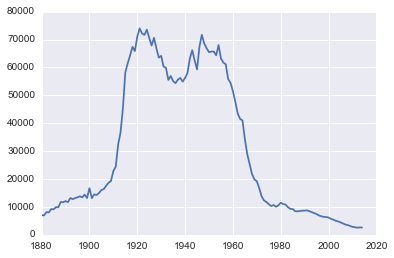

In [17]:
plotname('F', "Mary")

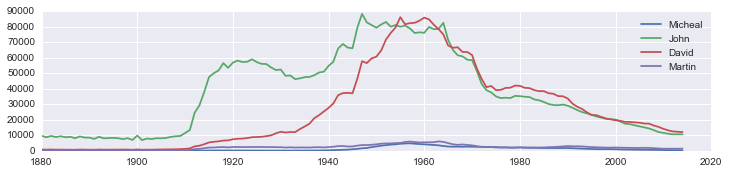

In [40]:
pp.figure(figsize= (12, 2.5))

names = ['Micheal', 'John', 'David', 'Martin']
for name in names:
    plotname('M', name)
    
pp.legend(names)

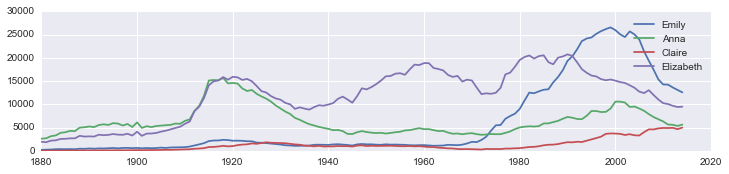

In [18]:

pp.figure(figsize= (12, 2.5))

names = ['Emily', 'Anna', 'Claire', 'Elizabeth']
for name in names:
    plotname('F', name)
    
pp.legend(names)

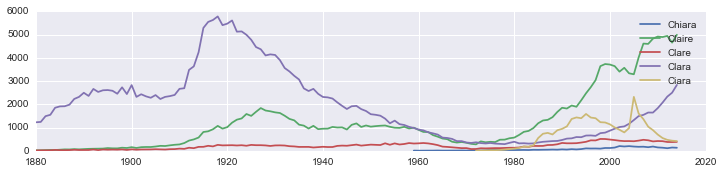

In [19]:
# look the name variants
pp.figure(figsize= (12, 2.5))

names = ['Chiara', 'Claire', 'Clare', 'Clara', 'Ciara']
for name in names:
    plotname('F', name)
    
pp.legend(names)

In [25]:
# we can vasualize the plot as a cumulative plot, as a stacked line chart
# plot the frequence of each variant on top of others, 

# first select the variables only contains the variants
# with 'F' and variables of chiara
allyears_indexed.loc['F'].loc[names].head()

number
name   year        
Chiara 1959       9
       1960       5
       1962       8
       1963       8
       1964      12

In [20]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head()

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880    NaN   NaN     21  1226    15
1881    NaN   NaN     23  1242    20
1882    NaN   NaN     30  1490    21
1883    NaN   NaN     38  1548    22
1884    NaN   NaN     33  1852    38

In [21]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

number                         
name Chiara Ciara Claire Clara Clare
year                                
1880      0     0     21  1226    15
1881      0     0     23  1242    20
1882      0     0     30  1490    21
1883      0     0     38  1548    22
1884      0     0     33  1852    38

In [28]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)

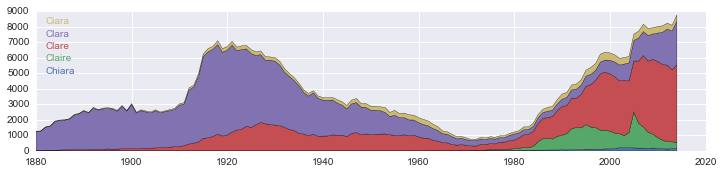

In [32]:
pp.figure(figsize= (12, 2.5))

palette = seaborn.color_palette()
# graph the stackplot for variants of clara
pp.stackplot(variants.index, variants.values.T, label=names)

for i, name in enumerate(names):
    pp.text(1882, 5000+800*i, name, color = palette[i])

In [24]:
# how to sort a dataframe by column
# droping columns from a dataframe
# joining frames based on index

# we can select data in year using .loc selection 
allyears_indexed.loc['M', :, 2008].sort('number', ascending =False).head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


number
sex name    year        
M   Jacob   2008   22568
    Michael 2008   20590
    Ethan   2008   20196
    Joshua  2008   19186
    Daniel  2008   18985

In [25]:
pop2008 = allyears_indexed.loc['M', :, 2008].sort('number', ascending =False)
# drop columns don't want
pop2008.reset_index().drop(['sex', 'year', 'number'], axis=1).head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel


In [26]:
# extract the top 10 names for certain sex and year
def topten(sex, year):
    # reset the index
    simple = allyears_indexed.loc[sex, :, year].sort('number', ascending = False).reset_index()
    # drop these columns
    simple = simple.drop(['sex', 'year', 'number'], axis = 1).head(10)
    # change the name of the column
    simple.columns = [year]
    # fix the index by add 1
    simple.index = simple.index + 1
    
    return simple

In [27]:
topten('M', 2009)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,2009
1,Jacob
2,Ethan
3,Michael
4,Alexander
5,William
6,Joshua
7,Daniel
8,Jayden
9,Noah
10,Christopher


In [28]:
# take range of years and join it 
def toptens(sex, year0, year1):
    years = [topten(sex, year) for year in range(year0, year1+1)]
    # use join function of dataframe, take the first list and then feed with the remaining years
    return years[0].join(years[1:])

In [29]:
toptens('M', 2000, 2010)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William
6,Nicholas,Nicholas,Andrew,Ethan,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander
7,Andrew,Andrew,Joseph,Joseph,Daniel,Daniel,Andrew,Anthony,William,Daniel,Noah
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,Anthony,Jayden,Daniel
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony


In [30]:
toptens('F', 1985, 1995)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
1,Jessica,Jessica,Jessica,Jessica,Jessica,Jessica,Ashley,Ashley,Jessica,Jessica,Jessica
2,Ashley,Ashley,Ashley,Ashley,Ashley,Ashley,Jessica,Jessica,Ashley,Ashley,Ashley
3,Jennifer,Amanda,Amanda,Amanda,Brittany,Brittany,Brittany,Amanda,Sarah,Emily,Emily
4,Amanda,Jennifer,Jennifer,Sarah,Amanda,Amanda,Amanda,Brittany,Samantha,Samantha,Samantha
5,Sarah,Sarah,Sarah,Jennifer,Sarah,Samantha,Samantha,Sarah,Emily,Sarah,Sarah
6,Stephanie,Stephanie,Stephanie,Brittany,Samantha,Sarah,Sarah,Samantha,Brittany,Taylor,Taylor
7,Nicole,Nicole,Brittany,Stephanie,Jennifer,Stephanie,Stephanie,Emily,Taylor,Brittany,Hannah
8,Heather,Brittany,Nicole,Samantha,Stephanie,Jennifer,Jennifer,Stephanie,Amanda,Amanda,Brittany
9,Elizabeth,Heather,Heather,Nicole,Lauren,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Amanda
10,Megan,Elizabeth,Elizabeth,Elizabeth,Elizabeth,Lauren,Emily,Megan,Stephanie,Megan,Elizabeth


In [71]:
toptens('F', 1985, 1995).stack().head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


1  1985    Jessica
   1986    Jessica
   1987    Jessica
   1988    Jessica
   1989    Jessica
dtype: object

In [31]:
toptens('F', 1985, 1995).stack().value_counts()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


Amanda       11
Jessica      11
Ashley       11
Elizabeth    11
Sarah        11
Brittany     10
Stephanie     9
Samantha      8
Jennifer      7
Emily         5
Nicole        4
Megan         3
Heather       3
Taylor        3
Lauren        2
Hannah        1
dtype: int64

In [32]:
# by this way we can find the top 6 of the most popular names for the decades
# we will use this list to extract its' count for each year
popular = toptens('F', 1985, 1995).stack().value_counts().index[:6]

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [33]:
popular

Index([u'Amanda', u'Jessica', u'Ashley', u'Elizabeth', u'Sarah', u'Brittany'], dtype='object')

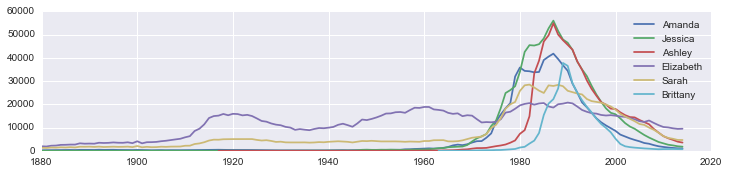

In [34]:
pp.figure(figsize=(12, 2.5))

for name in popular:
    plotname('F', name)
    
pp.legend(popular)

In [90]:
# identify name fad, names get popular suddenly and fady away quickly
# how to group data with groupby
# how to compute aggregations
# how to combining boolean masks
allyears.groupby(['sex', 'name']).sum().head()

number   year
sex name                    
F   Aabha          21   6037
    Aabriella      10   4022
    Aaden           5   2009
    Aadhira        29   6039
    Aadhya        639  16084

In [36]:
# the trick to calculate the spikes is the sum of the squares of the frequence 
# devided by the square of the total
totals = allyears.groupby(['sex', 'name'])['number'].sum()
def sumsq(x):
    return sum(x**2)

In [37]:
spikyness = allyears.groupby(['sex', 'name'])['number'].agg(sumsq)/totals**2

In [39]:
spikyness.head()

sex  name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
Name: number, dtype: float64

In [41]:
# only select the names with total counts greater than 5000
spiky_common = spikyness[totals > 5000].copy()
# sort the spike by descending order
spiky_common.sort(ascending = False)
# select the top 10 
spiky_common.head(10)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


sex  name     
M    Iker         0.199368
     Shaquille    0.195689
     Jase         0.182165
F    Adalynn      0.177107
     Harper       0.164827
M    Brantley     0.160532
F    Arya         0.159564
M    Bentley      0.159259
F    Miley        0.145886
     Paisley      0.144966
Name: number, dtype: float64

In [56]:
spiky_common.tail(10)

sex  name    
F    Rosalia     0.009405
M    Jess        0.009396
     Napoleon    0.009346
F    Rena        0.009261
M    Leander     0.009196
     Williams    0.009036
     Lemuel      0.009003
F    Minerva     0.008853
M    Hiram       0.008618
     Ike         0.008310
Name: number, dtype: float64

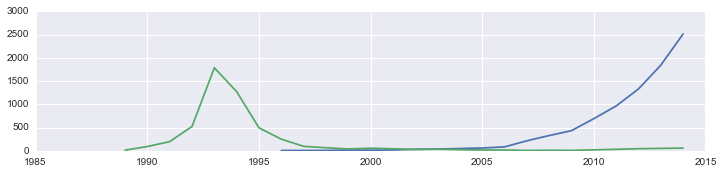

In [59]:
pp.figure(figsize = (12, 2.5))

plotname('F', 'Adalynn')
plotname('M', 'Shaquille')

In [44]:
# find the top 10 spike index
fads = spiky_common.head(10).index.values

In [45]:
fads

array([('M', 'Iker'), ('M', 'Shaquille'), ('M', 'Jase'), ('F', 'Adalynn'),
       ('F', 'Harper'), ('M', 'Brantley'), ('F', 'Arya'), ('M', 'Bentley'),
       ('F', 'Miley'), ('F', 'Paisley')], dtype=object)

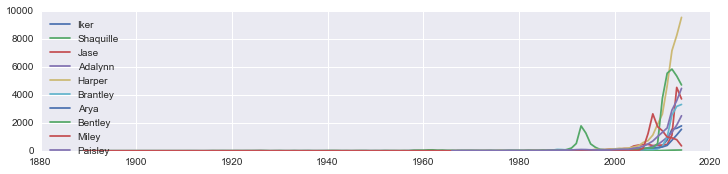

In [46]:
pp.figure(figsize= (12, 2.5))

for sex, name in fads:
    plotname(sex, name)
    
pp.legend([name for sex, name in fads], loc = 'upper left')

In [47]:
# we need to select the popular before last 10 years
totals_recent = allyears[allyears['year'] > 2005].groupby(['sex', 'name'])['number'].sum()

In [49]:
spiky_common = spikyness[(totals > 5000) & (totals_recent < 1000)].copy()
spiky_common.sort(ascending = False)
spiky_common.head(10)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


sex  name     
M    Shaquille    0.195689
F    Katina       0.120872
     Krystle      0.100106
M    Devante      0.099617
F    Khadijah     0.091410
     Shanice      0.089675
     Iesha        0.088810
     Shaniqua     0.087601
     Sheena       0.080751
     Marquita     0.080338
Name: number, dtype: float64

In [50]:
fads = spiky_common.head(10).index.values

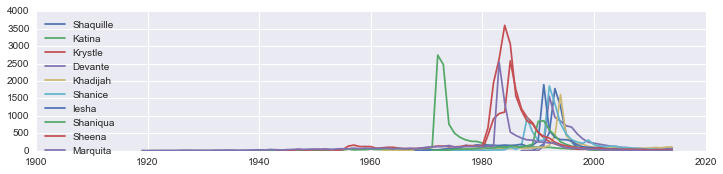

In [51]:
pp.figure(figsize= (12, 2.5))

for sex, name in fads:
    plotname(sex, name)
    
pp.legend([name for sex, name in fads], loc = 'upper left')

In [60]:
# compute the number of times that each name was used, seperated by boys and girls
# identify the unisex names where the ratio btw boys and girls totals is btw 1-to-4 and 4-to-1
# plot popularity vs. year for the top 10 unisex names

In [116]:
allyears_goouped = allyears.groupby(['sex', 'name'])['number'].sum()

In [118]:
# unstack the dataframe on sex
total_bysex = allyears_goouped.unstack('sex')
total_bysex.head()

sex,F,M
name,,
Aaban,NaN,72
Aabha,21,NaN
Aabid,NaN,5
Aabriella,10,NaN
Aadam,NaN,196


In [120]:
# sum two columns together by along the column axis
total_both = total_bysex.sum(axis = 1)


In [121]:
total_both.head()

name
Aaban         72
Aabha         21
Aabid          5
Aabriella     10
Aadam        196
dtype: float64

In [122]:
ratio = total_bysex['F']/total_bysex['M']

In [123]:
ratio.head()

name
Aaban       NaN
Aabha       NaN
Aabid       NaN
Aabriella   NaN
Aadam       NaN
dtype: float64

In [124]:
# compute the boolean mask to select the unisex names
unisex = (ratio > 0.25) & (ratio < 4)

In [125]:
total_both = total_both[unisex]
total_both.sort(ascending=False)
total_both.head()

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


name
Willie    593888
Jordan    479434
Taylor    416096
Leslie    376587
Jamie     350262
dtype: float64

In [126]:
names = total_both.head(10).index.values

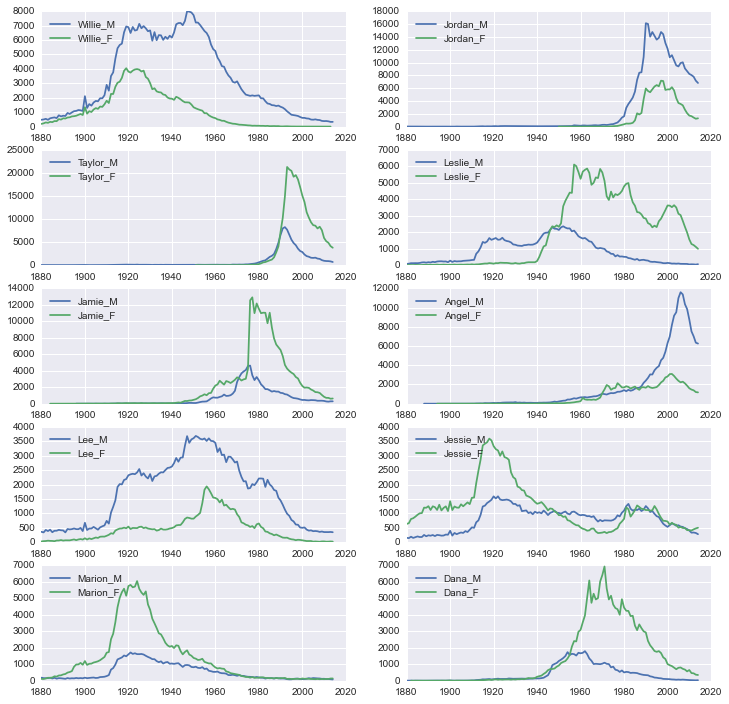

In [128]:
pp.figure(figsize = (12, 12))

for i, name in enumerate(names):
    pp.subplot(5, 2, i + 1)
    
    plotname('M', name)
    plotname('F', name)
    
    pp.legend([name + '_M', name + '_F'], loc = 'upper left')